In [29]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [30]:
df = pd.read_csv('datos.csv')

Analisis general de la informacion.

In [31]:
print(df.shape)
df.head()

(45451, 23)


,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,status,tagline,title,vote_average,vote_count,return,release_year,directores,name_crew,name_cast
0,Toy Story Collection,30000000.0,"Animation,Comedy,Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,...,Released,NaN,Toy Story,7.7,5415.0,12.451801,1995,John Lasseter,"John Lasseter,Joss Whedon,Andrew Stanton,Joel ...","Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal..."
1,NaN,65000000.0,"Adventure,Fantasy,Family",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures,Teitler Film,Interscope Commu...",United States of America,1995-12-15,...,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035,1995,Joe Johnston,"Larry J. Franco,Jonathan Hensleigh,James Horne...","Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra..."
2,Grumpy Old Men Collection,0.0,"Romance,Comedy",15602,en,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros.,Lancaster Gate",United States of America,1995-12-22,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,0.000000,1995,Howard Deutch,"Howard Deutch,Mark Steven Johnson,Mark Steven ...","Walter Matthau,Jack Lemmon,Ann-Margret,Sophia ..."
3,NaN,16000000.0,"Comedy,Drama,Romance",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,5.090760,1995,Forest Whitaker,"Forest Whitaker,Ronald Bass,Ronald Bass,Ezra S...","Whitney Houston,Angela Bassett,Loretta Devine,..."
4,Father of the Bride Collection,0.0,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions,Touchstone Pictures",United States of America,1995-02-10,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,0.000000,1995,Charles Shyer,"Alan Silvestri,Elliot Davis,Nancy Meyers,Nancy...","Steve Martin,Diane Keaton,Martin Short,Kimberl..."


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4482 non-null   object 
 1   budget                 45451 non-null  float64
 2   genres                 42984 non-null  object 
 3   id                     45451 non-null  int64  
 4   original_language      45440 non-null  object 
 5   overview               44510 non-null  object 
 6   popularity             45451 non-null  float64
 7   production_companies   33577 non-null  object 
 8   production_countries   39161 non-null  object 
 9   release_date           45451 non-null  object 
 10  revenue                45451 non-null  float64
 11  runtime                45205 non-null  float64
 12  spoken_languages       41475 non-null  object 
 13  status                 45371 non-null  object 
 14  tagline                20425 non-null  object 
 15  ti

In [33]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,return,release_year
count,4.545100e+04,45451.000000,45451.000000,4.545100e+04,45205.000000,45451.000000,45451.000000,4.545100e+04,45451.000000
mean,4.231294e+06,107984.599745,2.926887,1.121930e+07,94.181905,5.624085,109.989703,6.589542e+02,1991.882027
std,1.742942e+07,112111.336735,6.006458,6.433984e+07,38.329504,1.915424,491.352336,7.463165e+04,24.057726
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1874.000000
25%,0.000000e+00,26367.500000,0.389095,0.000000e+00,85.000000,5.000000,3.000000,0.000000e+00,1978.000000
50%,0.000000e+00,59871.000000,1.131386,0.000000e+00,95.000000,6.000000,10.000000,0.000000e+00,2001.000000
75%,0.000000e+00,156327.500000,3.694370,0.000000e+00,107.000000,6.800000,34.000000,0.000000e+00,2010.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,1.239638e+07,2020.000000


In [34]:
tipo_texto = df.select_dtypes(include=["object"]).columns
data_texto = df[tipo_texto]
data_texto.describe()

,belongs_to_collection,genres,original_language,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,directores,name_crew,name_cast
count,4482,42984,45440,44510,33577,39161,45451,41475,45371,20425,45451,44616,44728,43097
unique,1695,4057,89,44231,22634,2384,17333,1839,6,20269,42195,18829,42908,42656
top,The Bowery Boys,Drama,en,No overview found.,Metro-Goldwyn-Mayer (MGM),United States of America,2008-01-01,English,Released,Which one is the first to return - memory or t...,Blackout,John Ford,Georges Méliès,Georges Méliès
freq,29,5002,32249,133,742,17842,136,22370,45009,9,13,63,35,24


In [35]:
df.isnull().sum()

belongs_to_collection    40969
budget                       0
genres                    2467
id                           0
original_language           11
overview                   941
popularity                   0
production_companies     11874
production_countries      6290
release_date                 0
revenue                      0
runtime                    246
spoken_languages          3976
status                      80
tagline                  25026
title                        0
vote_average                 0
vote_count                   0
return                       0
release_year                 0
directores                 835
name_crew                  723
name_cast                 2354
dtype: int64

Mapa de calor

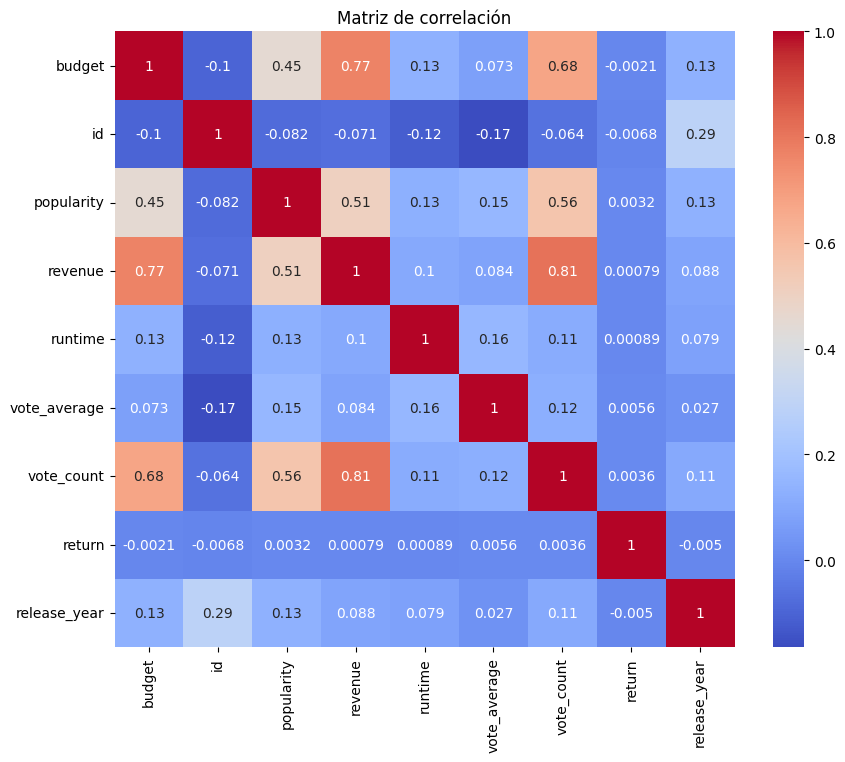

In [36]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Grafico de dispersion

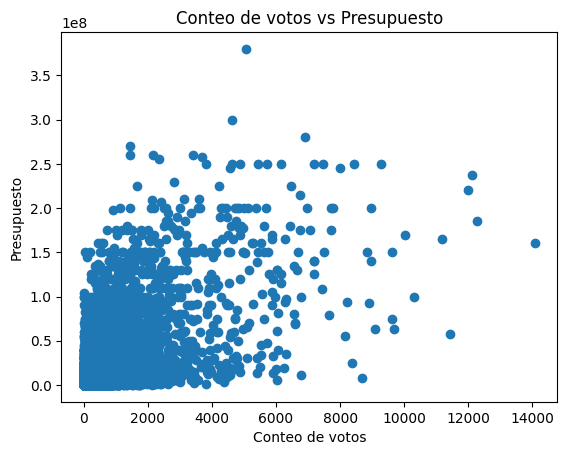

In [37]:
plt.scatter(df['vote_count'], df['budget'])
plt.xlabel('Conteo de votos')
plt.ylabel('Presupuesto')
plt.title('Conteo de votos vs Presupuesto')
plt.show()

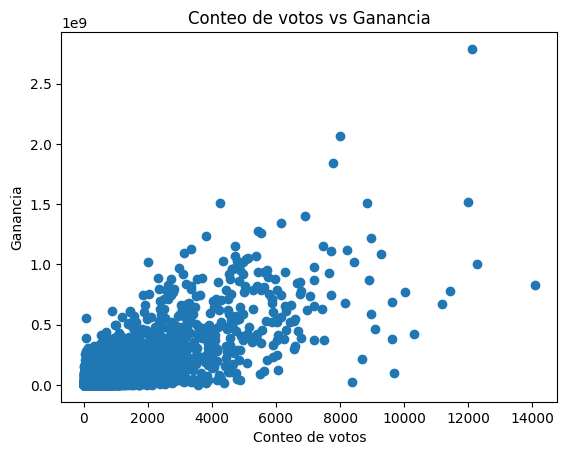

In [38]:
plt.scatter(df['vote_count'], df['revenue'])
plt.xlabel('Conteo de votos')
plt.ylabel('Ganancia')
plt.title('Conteo de votos vs Ganancia')
plt.show()

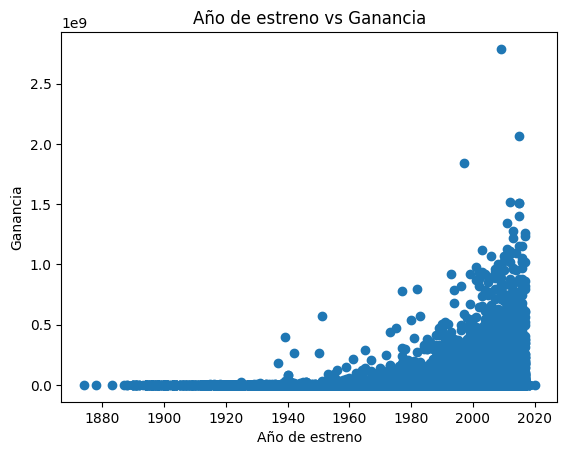

In [39]:
plt.scatter(df['release_year'], df['revenue'])
plt.xlabel('Año de estreno')
plt.ylabel('Ganancia')
plt.title('Año de estreno vs Ganancia')
plt.show()

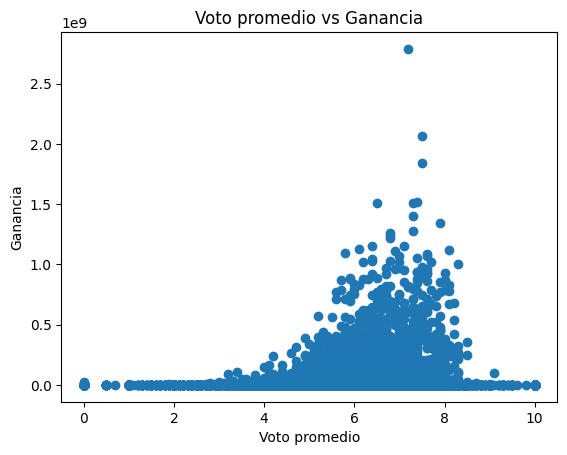

In [40]:
plt.scatter(df['vote_average'], df['revenue'])
plt.xlabel('Voto promedio')
plt.ylabel('Ganancia')
plt.title('Voto promedio vs Ganancia')
plt.show()

Grafico de barra

C:\Users\Vero\AppData\Local\Temp\ipykernel_5272\1101792966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux_genere['genre'] = df_aux_genere['genres'].str.split(',').str[0].str.strip()


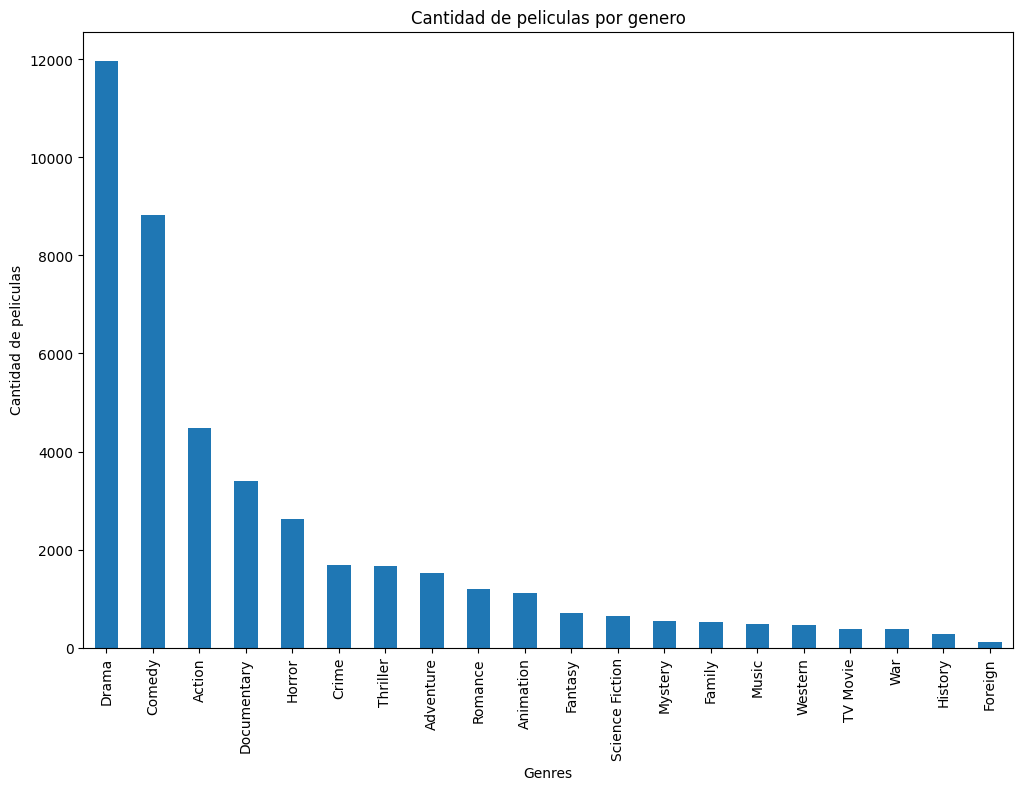

In [41]:
# Filtro del df original los generos unicos para evitar repeticiones y problemas al crear el grafico
df_aux_genere = df.dropna(subset=['genres'])
df_aux_genere['genre'] = df_aux_genere['genres'].str.split(',').str[0].str.strip()
movie_counts = df_aux_genere['genre'].value_counts()
# Creacion del grafico
plt.figure(figsize=(12, 8))
movie_counts.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Cantidad de peliculas')
plt.title('Cantidad de peliculas por genero')
plt.xticks(rotation=90)
plt.show()

Nubes de palabras

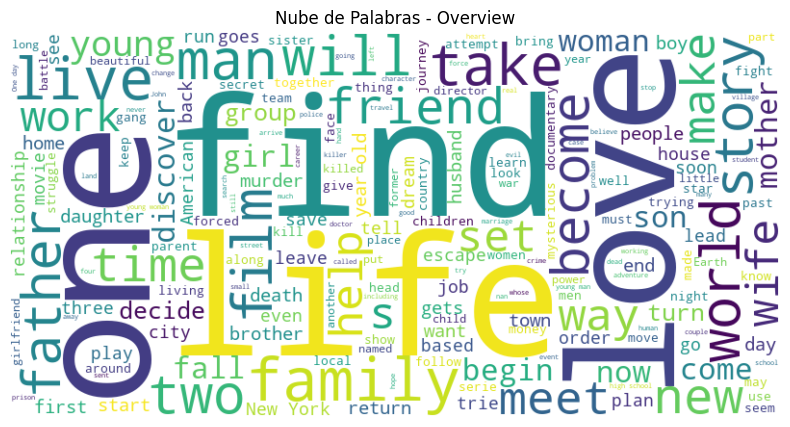

In [42]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['overview'].astype(str)))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Overview')
plt.show()

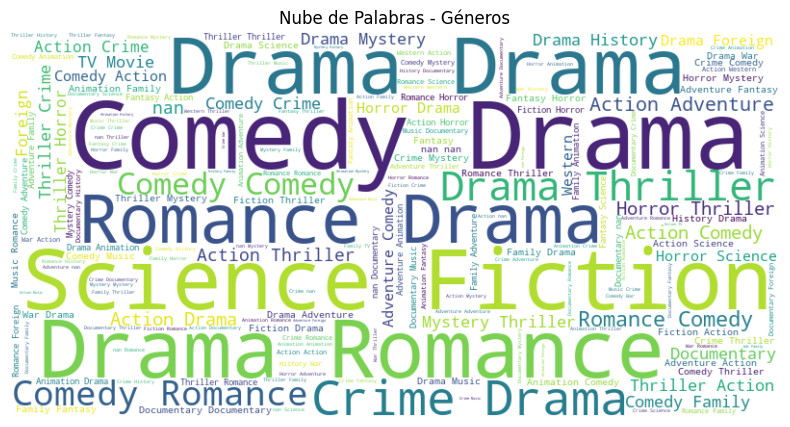

In [43]:
genres_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['genres'].astype(str)))
plt.figure(figsize=(10, 5))
plt.imshow(genres_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Géneros')
plt.show()

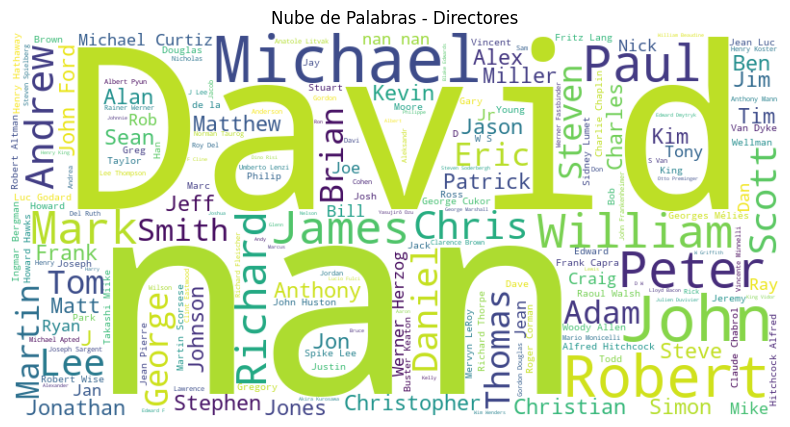

In [48]:
df['Director'] = df['directores'].fillna('')
directors_names = ' '.join(df['directores'].astype(str))
# Crea y muestra la nube de palabras
directors_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(directors_names)
plt.figure(figsize=(10, 5))
plt.imshow(directors_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Directores')
plt.show()